In [1]:
# This snippet of code properly adds the working source root path to python's path
# so you no longer have to install spykshrk through setuptools
import sys, os
root_depth = 2
notebook_dir = globals()['_dh'][0]
root_path = os.path.abspath(os.path.join(notebook_dir, '../'*root_depth))
# Add to python's path
try:
    while True:
        sys.path.remove(root_path)
except ValueError:
    # no more root paths
    pass
sys.path.append(root_path)
# Alternatively set root path as current working directory
#os.chdir(root_path)

In [24]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

#pd.set_option('float_format', '{:,.2f}'.format)
pd.set_option('display.precision', 4)
pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 180)


idx = pd.IndexSlice

In [120]:
# Load merged rec HDF store based on config

#config_file = '/opt/data36/daliu/realtime/spykshrk/test/test_animal.config.json'
config_file = '/home/mcoulter/spykshrk_realtime/config/test_single_MEC.json'
config = json.load(open(config_file, 'r'))

#hdf_file = os.path.join(config['files']['output_dir'],
#                        '{}.rec_merged.h5'.format(config['files']['prefix']))
hdf_file = '/mnt/vortex/mcoulter/spykshrk_realtime/output/test_single_MEC.rec_merged.h5'

store = pd.HDFStore(hdf_file, mode='r')


In [9]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: /mnt/vortex/mcoulter/spykshrk_realtime/output/test_single_MEC.rec_merged.h5

In [84]:
store.keys()

['/rec_1', '/rec_10', '/rec_100', '/rec_11', '/rec_3', '/rec_4', '/rec_5']

In [11]:
df = store['rec_100']

In [40]:
np.unique(df['label'])

array(['dec_proc', 'dec_recv', 'enc_recv', 'rip_recv', 'rip_send',
       'spk_dec', 'spk_enc', 'stim_rip_state'], dtype=object)

In [121]:
ripple_data = store['rec_1']
encoder_data = store['rec_3']
decoder_data = store['rec_4']
decoder_missed_spikes = store['rec_5']
timing_data = store['rec_100']
#stim_lockout = store['rec_11']

In [125]:
# most dropped spikes come from tet 5, and it is out of proportion to the firing rate
# firing rate of 5 is ~2x of 11 and 19 but dropout rate is ~6x
encoder_data.loc[encoder_data['position'] > 700]
#encoder_data
ripple_data.loc[ripple_data['thresh_crossed'] == False]
decoder_missed_spikes.loc[decoder_missed_spikes['elec_grp_id'] == 5]
#decoder_data.loc[decoder_data['elec_grp_id'] == 5]
decoder_missed_spikes.shape
encoder_data.shape
#ripple_data[10000:10010]

(82474, 454)

In [124]:
np.histogram(decoder_missed_spikes['late_bin']-decoder_missed_spikes['real_bin'])

(array([58417,     0,  1980,     0,     0,   237,     0,    22,     0,
            2]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]))

In [127]:
linear_position = np.loadtxt('/mnt/vortex/mcoulter/remy_trodes_linear_position_for_numpy.txt',delimiter=',')

array([[3.95250480e+07, 4.00000000e+00, 6.40641540e-01, 6.60000000e+02,
        4.18000000e+02],
       [3.95259720e+07, 4.00000000e+00, 6.45975070e-01, 6.61000000e+02,
        4.18000000e+02],
       [3.95268600e+07, 4.00000000e+00, 6.45975070e-01, 6.61000000e+02,
        4.17000000e+02],
       ...,
       [1.19825625e+08, 7.00000000e+00, 1.00000000e+00, 3.47000000e+02,
        8.70000000e+01],
       [1.19826513e+08, 7.00000000e+00, 1.00000000e+00, 3.48000000e+02,
        8.60000000e+01],
       [1.19827705e+08, 7.00000000e+00, 1.00000000e+00, 3.48000000e+02,
        8.60000000e+01]])

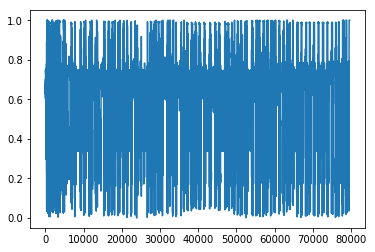

In [139]:
plt.plot(linear_position[:,2])
linear_position

In [140]:
segment = linear_position[:,1]
segment_pos = linear_position[:,2]
shift_linear_distance_by_arm_dictionary = dict()
#arm_shift_dictionary()

hardcode_armorder = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14] #add progressive stagger in this order
hardcode_shiftamount = 20 # add this stagger to sum of previous shifts
        # for now set all arm lengths to 60
linearization_arm_length = 60
    
        # Define dictionary for shifts for each arm segment
        #shift_linear_distance_by_arm_dictionary = dict() # initialize empty dictionary 
for arm in hardcode_armorder: # for each outer arm
    if arm < 7: # if all box segments, do nothing
        temporary_variable_shift = 0

    else: # if arm segments, shift with gap
        temporary_variable_shift = hardcode_shiftamount + linearization_arm_length + shift_linear_distance_by_arm_dictionary[hardcode_armorder[arm - 1]]
        
    shift_linear_distance_by_arm_dictionary[arm] = temporary_variable_shift
    
assigned_pos = 0

assigned_pos = segment_pos*60 + shift_linear_distance_by_arm_dictionary[segment]

    

NameError: name 'arm_shift_dictionary' is not defined

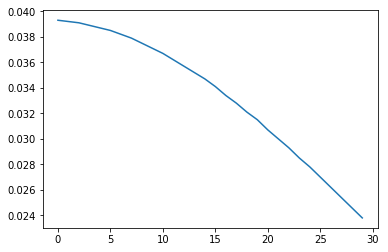

In [38]:
speedFilterValues = [0.0393,0.0392,0.0391,0.0389,0.0387,0.0385,0.0382,0.0379,
        0.0375,0.0371,0.0367,0.0362,0.0357,0.0352,0.0347,0.0341,0.0334,0.0328,0.0321,
        0.0315,0.0307,0.0300,0.0293,0.0285,0.0278,0.0270,0.0262,0.0254,0.0246,0.0238]
plt.plot(speedFilterValues)

In [8]:
stim_lockout_ranges = stim_lockout.pivot(index='lockout_num',columns='lockout_state', values='timestamp')
stim_lockout_ranges.reindex(columns=[1,0])

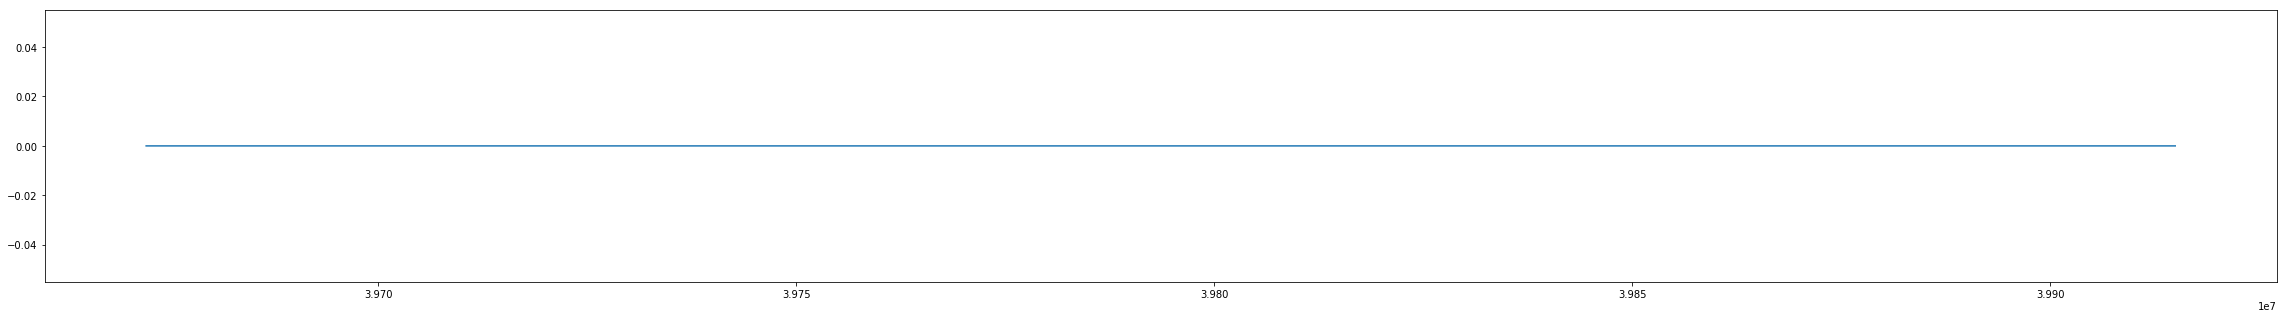

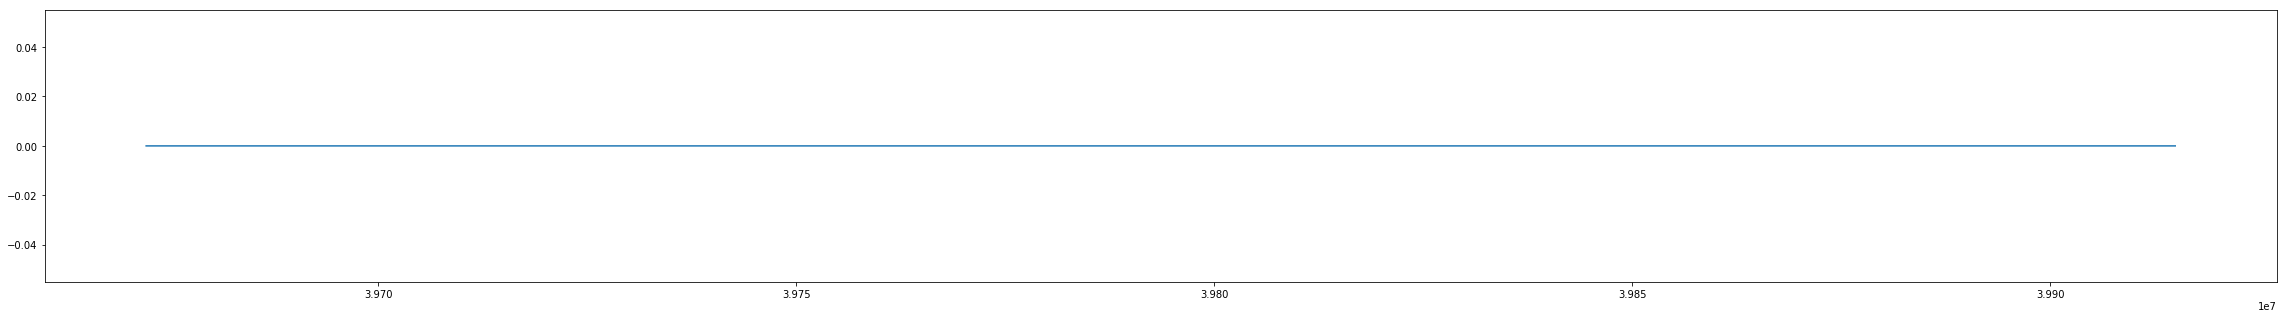

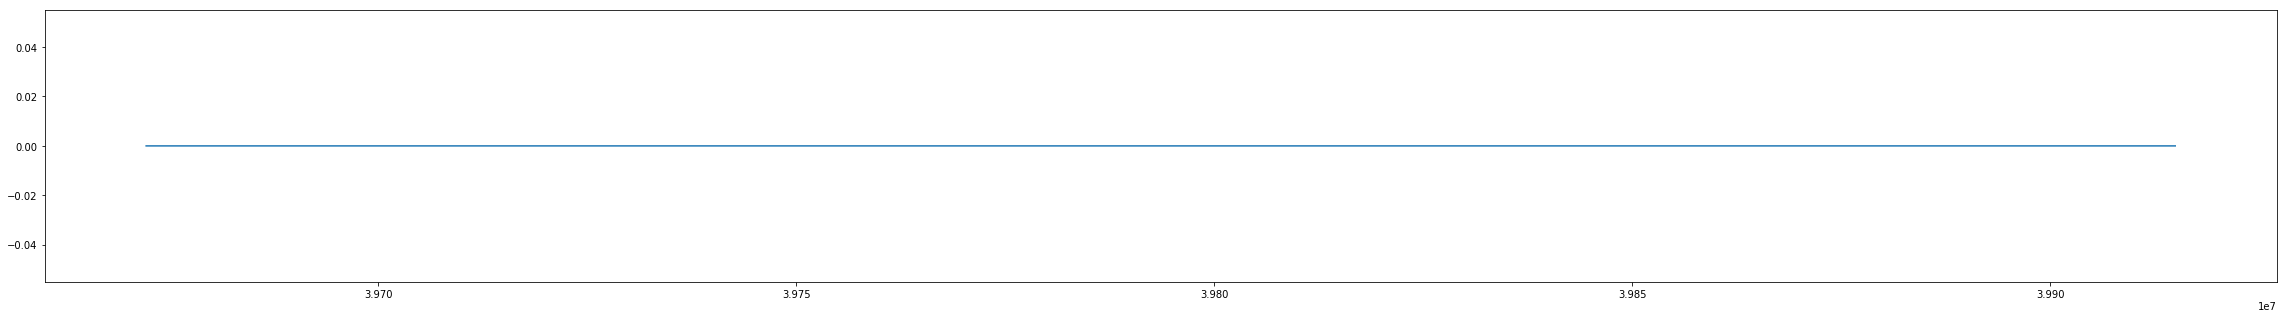

In [15]:
for group in ripple_data.groupby('elec_grp_id'):
    plt.figure(figsize=[40,5])
    lfp_data = group[1]['lfp_data']
    timestamp = group[1]['timestamp']
    plt.plot(timestamp, lfp_data)
    #plt.plot(stim_lockout_ranges.values.transpose(), np.tile([[400], [400]], [1, len(stim_lockout_ranges)]), 'r-*' )
plt.show()

In [11]:
plt.plot([[0, 1]], [[10, 10]], '-*')
plt.show()

In [16]:
pd.set_option('display.max_rows', 10)

ripple_data

,rec_ind,timestamp,elec_grp_id,thresh_crossed,lockout,custom_mean,custom_std,lfp_data,rd,current_val
0,1,39672240,5,False,False,12.769,8.034,0.0,0.0,0.0
1,4,39672240,11,False,False,13.067,8.143,0.0,0.0,0.0
2,7,39672240,19,False,False,12.997,8.057,0.0,0.0,0.0
3,10,39672260,5,False,False,12.769,8.034,0.0,0.0,0.0
4,13,39672260,11,False,False,13.067,8.143,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
36409,109225,39914960,5,False,False,12.769,8.034,0.0,0.0,0.0
36410,109231,39914960,19,False,False,12.997,8.057,0.0,0.0,0.0
36411,109237,39914980,11,False,False,13.067,8.143,0.0,0.0,0.0
36412,109234,39914980,5,False,False,12.769,8.034,0.0,0.0,0.0
